Data:
https://www.kaggle.com/uciml/pima-indians-diabetes-database

Load the dataset<p>
Perform exploratory data analysis


1. Target variable distribution
2. Examine missing values
3. Examine data types
4. Examine data distribution
5. Examine data intercorrelations


<p>
5 pts.



In [46]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [47]:
diabetes_data = pd.read_csv('diabetes.csv')

In [48]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

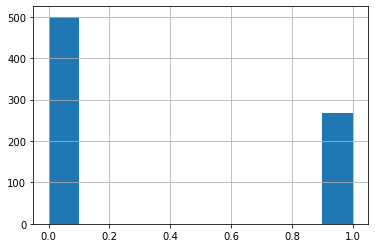

In [49]:
diabetes_data.Outcome.hist()

<AxesSubplot:>

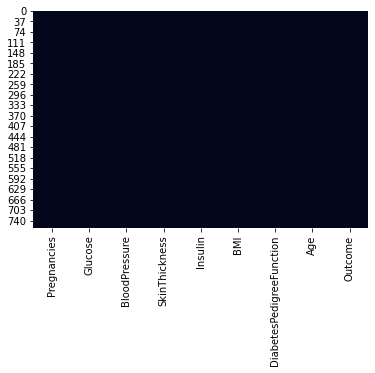

In [50]:
sns.heatmap(diabetes_data.isnull(), cbar=False)

In [51]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [52]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [74]:
diabetes_data= diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure',
          'Outcome']]

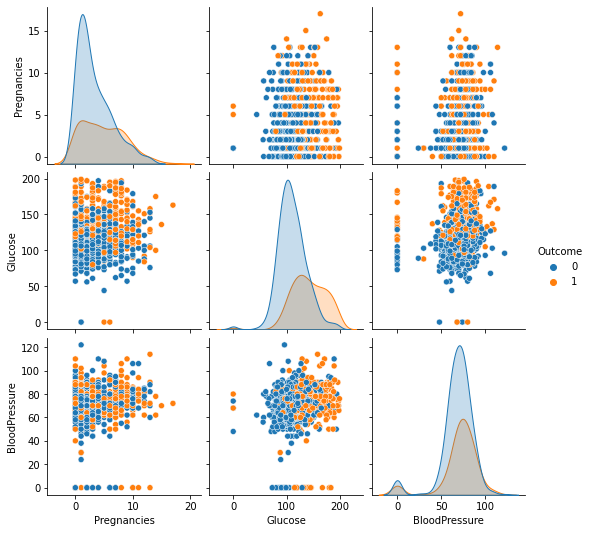

In [75]:
sns.pairplot(diabetes_data, hue = 'Outcome')

Split data 70/30 into training and test datasets.<p>
Build a logistic regression model to predict diabetes<p>

5 pts.

In [76]:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [78]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [79]:
y_pred = logmodel.predict(X_test)


Evaluate model performance. <p>
Display the confusion matrix.<p>
Report the following metrics: 

1.   ROC AUC
2.   Accuracy
<li>Recall
<li>Precision
<li>Display the ROC curve.
<p>

5 pts.





In [80]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

confusion_matrix(y_test,y_pred)

array([[133,  13],
       [ 40,  45]], dtype=int64)

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       146
           1       0.78      0.53      0.63        85

    accuracy                           0.77       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



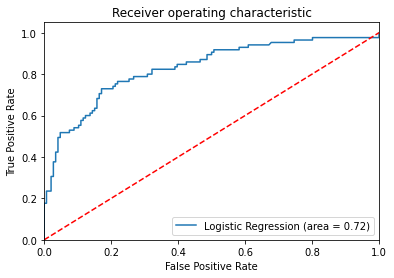

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Determine which features have no effect on the Outcome (Hint: you will need to use statsmodels). <p>
Exclude  features with non-statistically significant effects in the model, rebuild the model and assess how the reduced feature set affects model performance.

5 pts.

In [83]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())

Optimization terminated successfully.
         Current function value: 0.605445
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.056     
Dependent Variable: Outcome          AIC:              656.2479  
Date:               2021-10-18 13:02 BIC:              669.1059  
No. Observations:   537              Log-Likelihood:   -325.12   
Df Model:           2                LL-Null:          -344.51   
Df Residuals:       534              LLR p-value:      3.7936e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Pregnancies        0.0799   0.0288  2.7748 0.0055  0.0235  0.1364
Glucose            0.0123   0.0025  4.9694 0.0000  0.0075  0.0172


In [84]:
# exclude Insulin, BMI, Diabetes Pedigree Function, skin thickness due to P values above 0.5 which tells me that these predictors have little effect on the Target Variable.

In [85]:
# The area under the curve for the ROC chart increased to .72, while the current finction value remained around the same.